# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent. 
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

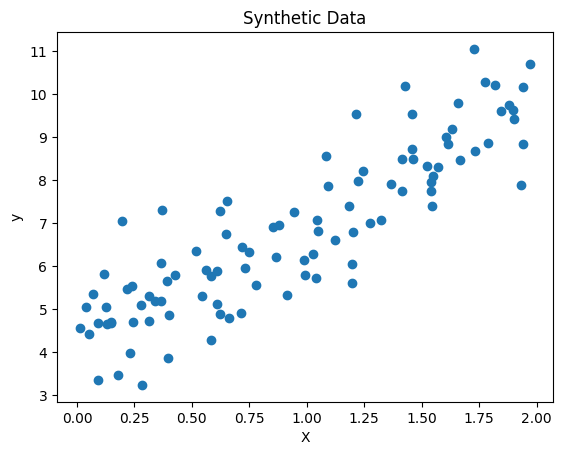

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995],
       [ 5.29307969],
       [ 5.82639572],
       [ 8.67878666],
       [ 6.79819647],
       [ 7.74667842],
       [ 5.03890908],
       [10.14821022],
       [ 8.46489564],
       [ 5.7873021 ],
       [ 5.18802735],
       [ 6.06907205],
       [ 5.12340036],
       [ 6.82087644],
       [ 6.19956196],
       [ 4.28385989],
       [ 7.96723765],
       [ 5.09801844],
       [ 5.75798135],
       [ 5.96358393],
       [ 5.32104916],
       [ 8.29041045],
       [ 4.85532818],
       [ 6.28312936],
       [ 7.3932017 ],
       [ 4.68275333],
       [ 9.53145501],
       [ 5.19772255],
       [ 4.64785995],
       [ 9.61886731],
       [ 7.87502098],
       [ 8.82387021],
       [ 5.88791282],
       [ 7.0492748 ],
       [ 7.91303719],
       [ 6.9424623 ],
       [ 4.69751764],
       [ 5.80238342],
       [ 5.34915394],
       [10.20785545],
       [ 6.34371184],
       [ 7

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()



## Do Train-Test Split (75%-25%)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)





## Do the Linear Regression with Scikit-Learn Library

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_percentage_error
import pandas as pd
import numpy as np

lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred


R2_1 = r2_score(y_pred,y_test)
R2_1
MAPE_1 = mean_absolute_percentage_error(y_pred,y_test)
MAPE_1
result_df = pd.DataFrame(columns=['model','MAPE','R2_score'])
result_df.loc[len(result_df)] = ['linear regression',MAPE_1,R2_1]
result_df

,model,MAPE,R2_score
0,linear regression,0.139248,0.694651


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [43]:
from sklearn.linear_model import Ridge,Lasso


r = Ridge()
r.fit(X_train,y_train)
y_pred1 = r.predict(X_test)
y_pred1

MAPE_2 = mean_absolute_percentage_error(y_pred1,y_test)
R2_2 = r2_score(y_pred1,y_test)

l  = Lasso()
l.fit(X_train,y_train)
y_pred2 = l.predict(X_test)
y_pred2

MAPE_3 = mean_absolute_percentage_error(y_pred2,y_test)
R2_3 = r2_score(y_pred2,y_test)

result_df.loc[len(result_df)] = ['Ridge regression',MAPE_2,R2_2]
result_df.loc[len(result_df)] = ['Lasso regression',MAPE_3,R2_3]
result_df

X_train
y_train

array([[ 8.48372443],
       [ 9.73664501],
       [ 7.06574625],
       [ 5.03890908],
       [ 7.86711877],
       [ 8.72049122],
       [ 8.99781574],
       [ 6.44386684],
       [ 9.53623265],
       [ 5.80238342],
       [ 4.28385989],
       [ 4.85532818],
       [ 5.91306699],
       [ 6.28312936],
       [ 9.40527849],
       [ 5.34915394],
       [ 5.96358393],
       [ 8.56331925],
       [ 5.60438199],
       [ 6.34371184],
       [ 8.31932218],
       [11.04439507],
       [ 5.19772255],
       [ 6.14696329],
       [10.70314449],
       [ 9.53145501],
       [ 8.08449921],
       [ 4.79408465],
       [ 9.18975324],
       [ 4.71643995],
       [ 8.86548845],
       [ 7.74667842],
       [10.28665258],
       [ 5.88791282],
       [ 5.47453181],
       [ 4.64785995],
       [ 8.82387021],
       [ 7.91303719],
       [ 7.96723765],
       [ 8.21362168],
       [ 3.87183748],
       [ 5.53962564],
       [ 7.27306077],
       [ 7.3932017 ],
       [ 3.4686513 ],
       [ 8

## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:
![Gradient Derivation](derivation.jpg)




## 🧠 Custom Linear Regression Class

In [55]:

class MyLinearRegression:
    def __init__(self):
        self.m = 0
        self.c = 0
        self.coef_ = (self.m,self.c)
        self.loss_curve = []

    def fit(self, X, y, lr = 0.01, n_iters = 1000):
        n = len(X)
        X = X.reshape(-1)
        y = y.reshape(-1)

        for _ in range(n_iters):
            y_pred = self.m*X + self.c
            error = y-y_pred

            loss = (1/n) * np.sum(error**2)
            self.loss_curve.append(loss)

            dm = (-2/n)*np.dot(X,(error))
            dc = (-2/n)*sum(error)

            self.m -= lr*dm
            self.c -= lr*dc

        self.coef_ = (self.m,self.c)


    def predict(self, X):
        X = X.reshape(-1)
        return self.m*X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)


## 🔁 Train the Model and Visualize the Fit

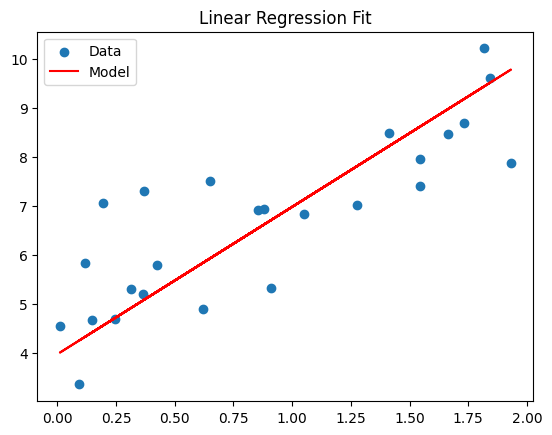

Learned coefficients (m, c): (np.float64(3.033268870750776), np.float64(3.938583976518225))


In [56]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred_cust = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coef_)


## 📉 Plot the Loss Curve

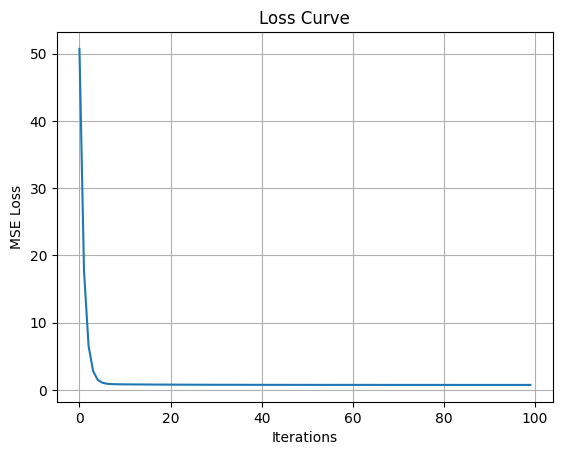

In [71]:
plt.plot(model.loss_curve)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [73]:

class MyLinearRegressionSGD:
    def __init__(self):
        self.m = 0
        self.c = 0
        self.coef_ = (self.m,self.c)
        self.loss_curve = []

    def fit(self, X, y, lr = 0.01, n_iters = 100):
        n = len(X)
        X = X.reshape(-1)
        y = y.reshape(-1)

        for _ in range(n_iters):
            for i in range(n):
                xi = X[i]
                yi = y[i]
                y_pred = self.m*xi + self.c
                error = yi-y_pred

                dm = -2 *xi*error
                dc = -2*error

                self.m -= lr*dm
                self.c -= lr*dc
            y_pred_all  = self.m*X + self.c
            epoch_loss = (1/n) * np.sum((y-y_pred_all)**2)
            self.loss_curve.append(epoch_loss)
        self.coef_ = (self.m,self.c)


    def predict(self, X):
        X = X.reshape(-1)
        return self.m*X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)


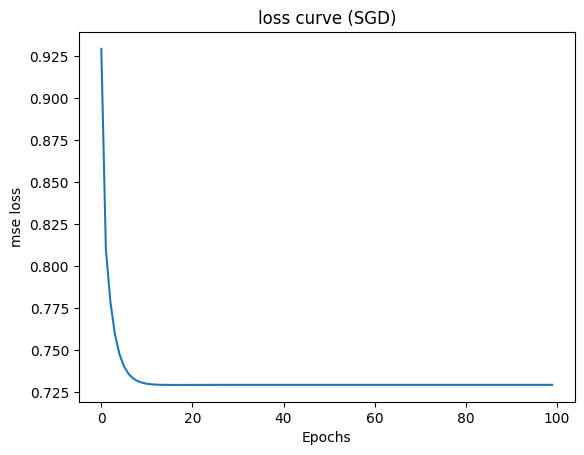

In [77]:
model_sgd = MyLinearRegressionSGD()
model_sgd.fit(X_train,y_train,lr = 0.01,n_iters=100)
pred = model_sgd.predict(X_test)
plt.plot(model_sgd.loss_curve)
plt.title("loss curve (SGD)")
plt.xlabel("Epochs")
plt.ylabel("mse loss")
plt.show()

## Visualize the prediction result of Library version and Custom regression code created

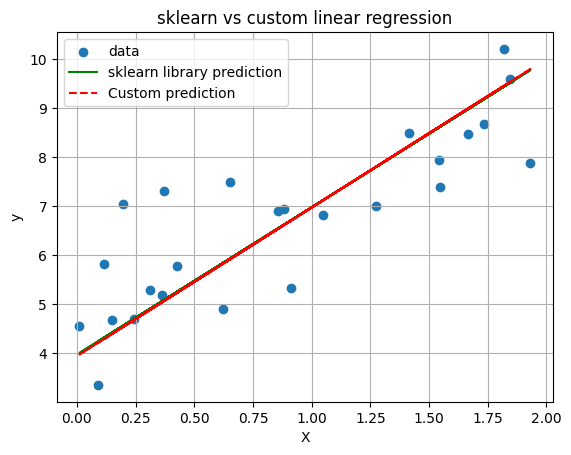

,0
7.122039,7.124467
8.226761,8.219424
9.455011,9.436817
7.806350,7.802730
4.884931,4.907133
4.387779,4.414375
5.041632,5.062449
8.617525,8.606734
5.825170,5.839061
9.796627,9.775414


In [72]:
plt.Figure(figsize=(10,6))
plt.scatter(X_test,y_test,label = "data")
plt.plot(X_test,y_pred,label = 'sklearn library prediction',color = "green")
plt.plot(X_test,y_pred_cust,color = "red",linestyle = '--',label = "Custom prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("sklearn vs custom linear regression")
plt.legend()
plt.grid(True)
plt.show()
df = pd.DataFrame(y_pred,y_pred_cust)
df

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version